In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [4]:
df = pd.read_csv('../data/marketing_campaign.csv', sep='\t')

**Вопрос #1:** Смотря на relplot график №1 можно заметить, что у людей старше 1940 года наблюдается небольшая дисперсия дохода и что этот доход постепенно понижается до  1990 года, но у людей, которые родились +- псоле 1990, доход  повышается. Опираясь на relplot график №2 можно заметить, что у людей, родившихся в районе 1980 года, у которых семейный статус "*together*", наблюдается скачок дохода. В остальном семейный статус не сильно влияет на доход покупателя. 

<Figure size 2000x500 with 0 Axes>

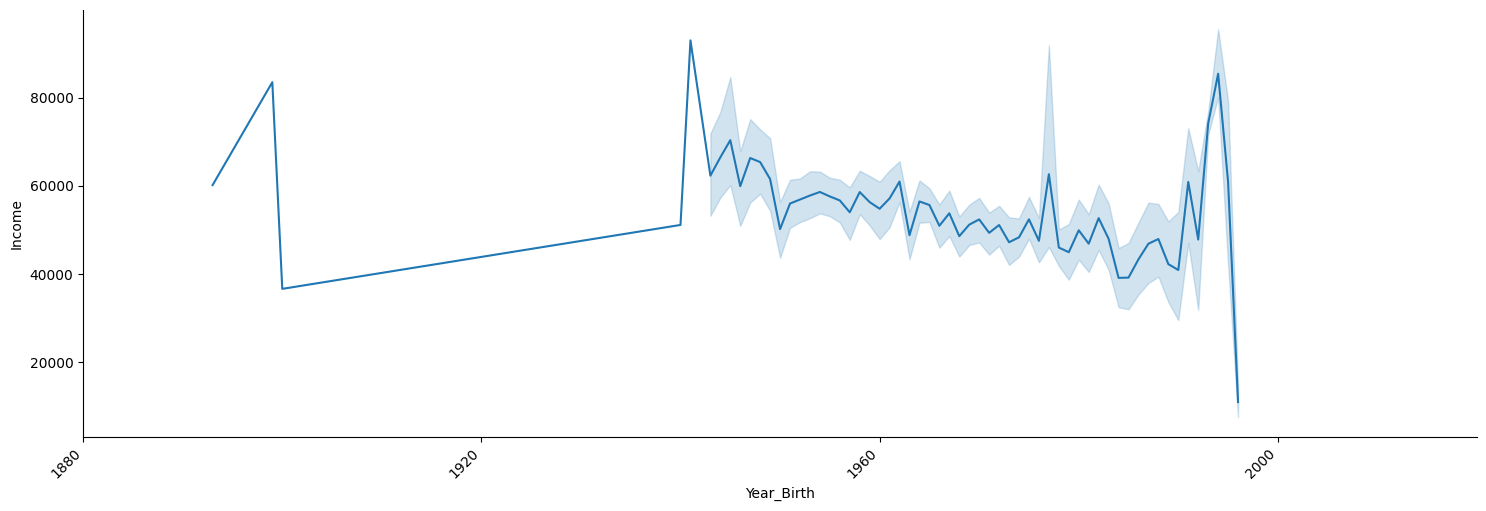

In [5]:
# Построение relplot графика №1, отображающего отношение возраста покупателя к доходу покупателя

plt.figure(figsize=(20, 5))

g = sns.relplot(
    data=df,
    x='Year_Birth',
    y='Income',
    kind='line',
    aspect=3
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

<Figure size 2000x500 with 0 Axes>

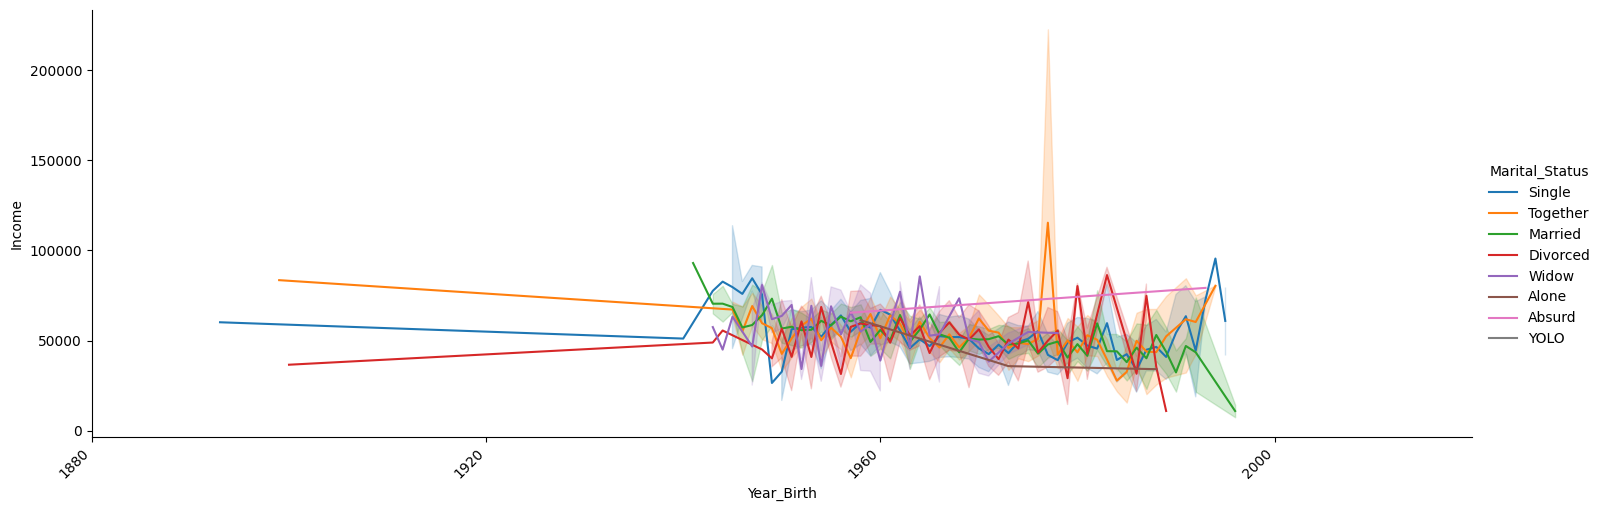

In [6]:
# Построение relplot графика №2, отображающего отношение возраста покупателя к доходу покупателя
# с учётом семейного положения


plt.figure(figsize=(20, 5))

g = sns.relplot(
    data=df,
    x='Year_Birth',
    y='Income',
    hue='Marital_Status',
    kind='line',
    aspect=3
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

**Вопрос #2:** на основании графиков №3 и №4 я могу сделать вывод о том, что у покупателей с семейным положением *"Single"*, *"Together"*, *"Married"* и *"Divorced"* количество детей в среднем колеблется от 0 до 1, максимальное количество детей у этих категорий - 2. У покупателей с семейным положением *"Widow"*, *"Absurd"* и *"YOLO"* количество детей - 0 (у *"Widow"* может достигать максимального значения 1), у покупателей с категорией семейного положения *"Alone"* количество детей - 1.

<Axes: xlabel='Marital_Status', ylabel='Kidhome'>

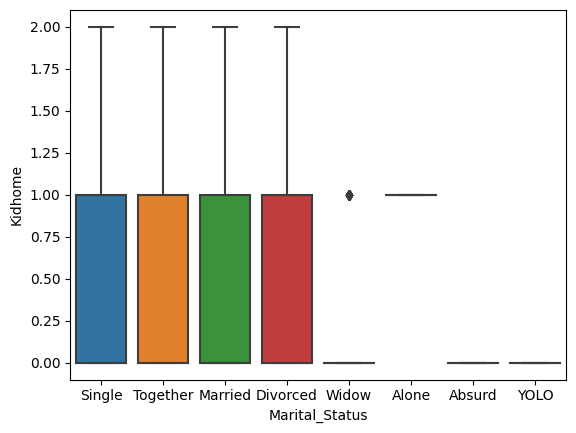

In [32]:
# Построение boxplot графика №3, отображающего отношение семейного положения к количеству детей

sns.boxplot(x='Marital_Status', y='Kidhome', data=df, whis=10)

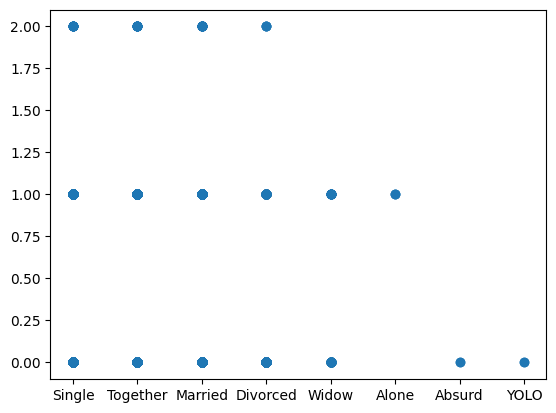

In [33]:
# Построение plot графика №4, отображающего отношение семейного положения к количеству детей

plt.plot(df['Marital_Status'], df['Kidhome'], 'o')

In [23]:
df.loc[df['Marital_Status'] == 'Widow']['Kidhome'].value_counts()

Kidhome
0    59
1    18
Name: count, dtype: int64


**Вопрос #3:** на основании графика №5 можно сделать вывод о том, что чем больше доход у покупателя, тем меньше больше его затраты на золото. У покупателей, чей доход меньше 100 000, траты на золото больше всего и колеблятся от 50 до 300, а у покуптелей, чей доход больше 100 000, значение трат на золото меньше 50 и колеблется близ 0.

<Figure size 2000x500 with 0 Axes>

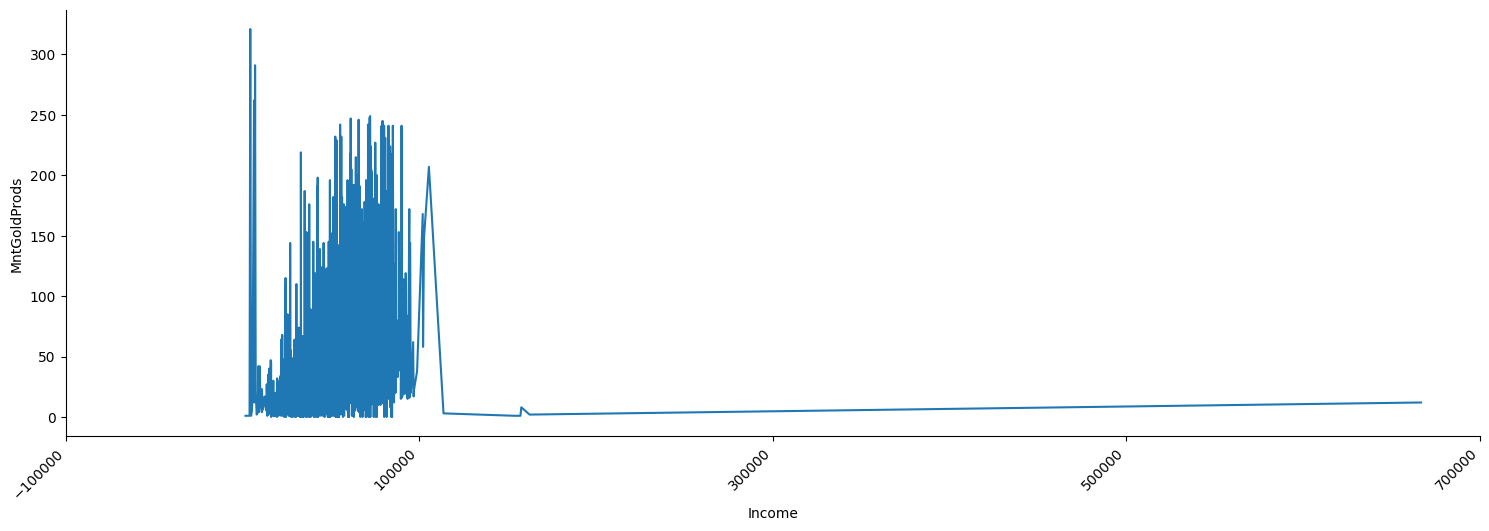

In [36]:
# Построение relplot графика №5, показывающщего отношение дохода покупателя к затратам на золото

plt.figure(figsize=(20, 5))

g = sns.relplot(
    data=df,
    x='Income',
    y='MntGoldProds',
    kind="line",
    aspect=3
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

**Вопрос #4:** на графике №6 можно заметить, что у людей, которые родились раньше 1920 года, количество покупок через веб сайт колеблется от 0 до 5 (так как это пожилые люди у которых нет возможности пользоваться технологиями), а у людей, чей год рождения находится выше 1940, наблюдается разброс значений от 0 до 25, но в основном количество покупок через веб-сайт у них - от 0 до 12. На графике №7 видно, что у покупателей, которые родились раньше 1940, количество покупок в магазине колеблется от 2 до 4, а у покупателей, которые родилились позже 1940, значение количества покупок в физическом магазине в среднем колеблется от 5 до 9.

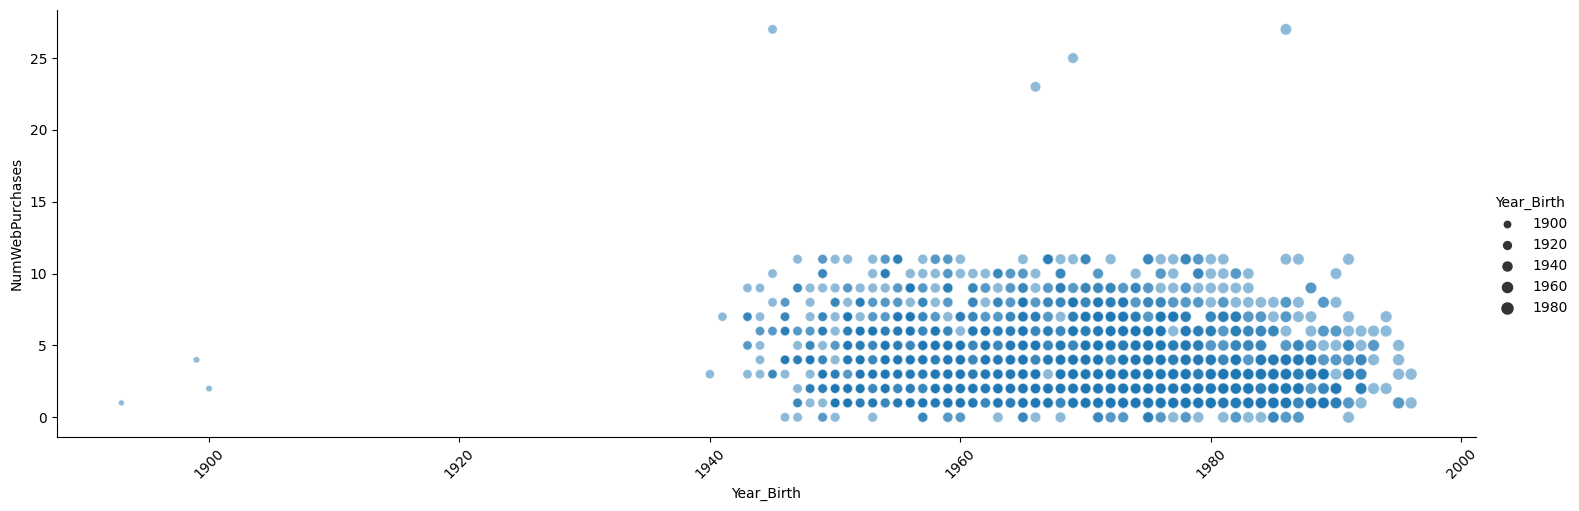

In [35]:
# Построение relplot графика №6, отражающего отношение возраста покупателя к количеству его покупок через веб-сайт

params = {'data': df,
          'kind': 'scatter',
          'x': 'Year_Birth',
          'y': 'NumWebPurchases',
          'size': 'Year_Birth',
          'aspect': 3, 
          'alpha': 0.5}

g = sns.relplot(**params)
plt.xticks(rotation=45);

<Figure size 2000x500 with 0 Axes>

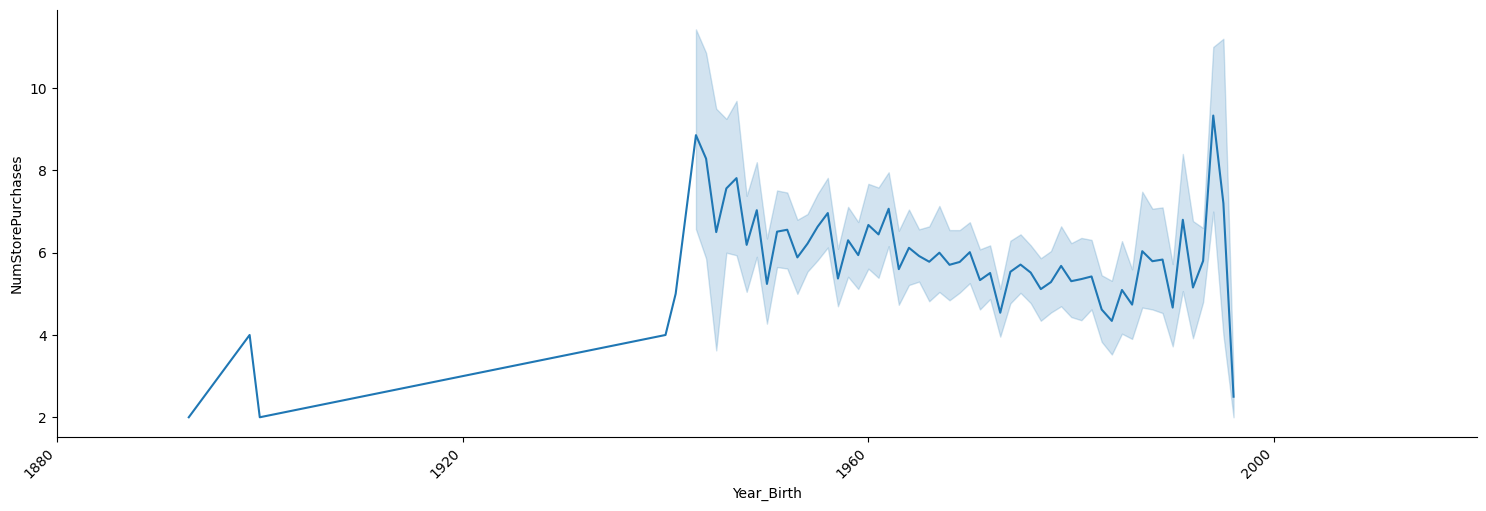

In [31]:
# Построение relplot графика №7, отражающего отношение возраста покупателя к количеству его покупок в физическом магазине

plt.figure(figsize=(20, 5))

g = sns.relplot(
    data=df,
    x='Year_Birth',
    y='NumStorePurchases',
    kind="line",
    aspect=3
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

**Гипотезы на основе матрицы корреляции:** по матрице корреляции видна зависимость между фичами:
1) Между *"Income"* (доходом) и *"MntWines"* (тратами на вино за последние 2 года), *"NumCatalogPurchases"* (количеством покупок через каталог), *"MntMeatProducts"* (тратами на мясные продукты за последние 2 года);
2) Между *"NumCatalogPurchases"* (количеством покупок через каталог) и *"MntWines"* (затратами на вино за последние 2 года), *"MntMeatProducts"* (затратами на мясо за последние два года);

In [36]:
int_df = df.copy()
cat_columns = df.select_dtypes(['object']).columns
int_df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [39]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<Axes: >

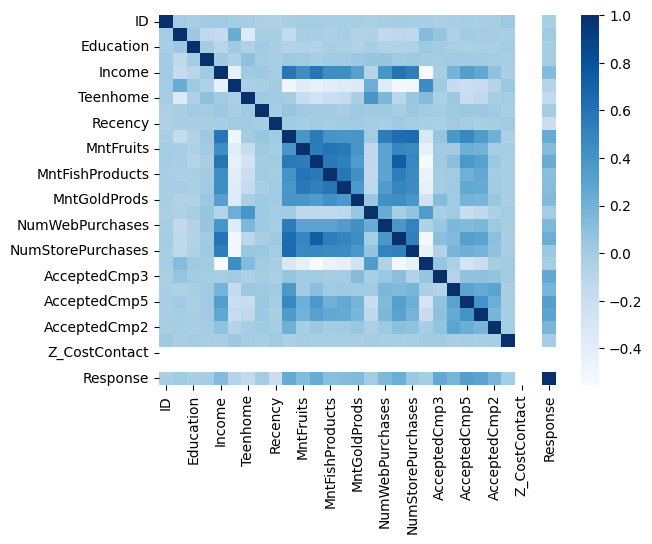

In [37]:
# Построение матрицы корреляции

sns.heatmap(int_df.corr(), cmap='Blues')

**Дополнительные наблюдения:** смотря на гистограмму ниже можно сделать несколько наблюдений:
1) Большинство покупателей родились в районе 1970 года;
2) У большинства покупателей годовой доход меньше 100 000;
3) Большинство покупателей не имеют детей;

/tmp/ipykernel_13882/3993376663.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax);


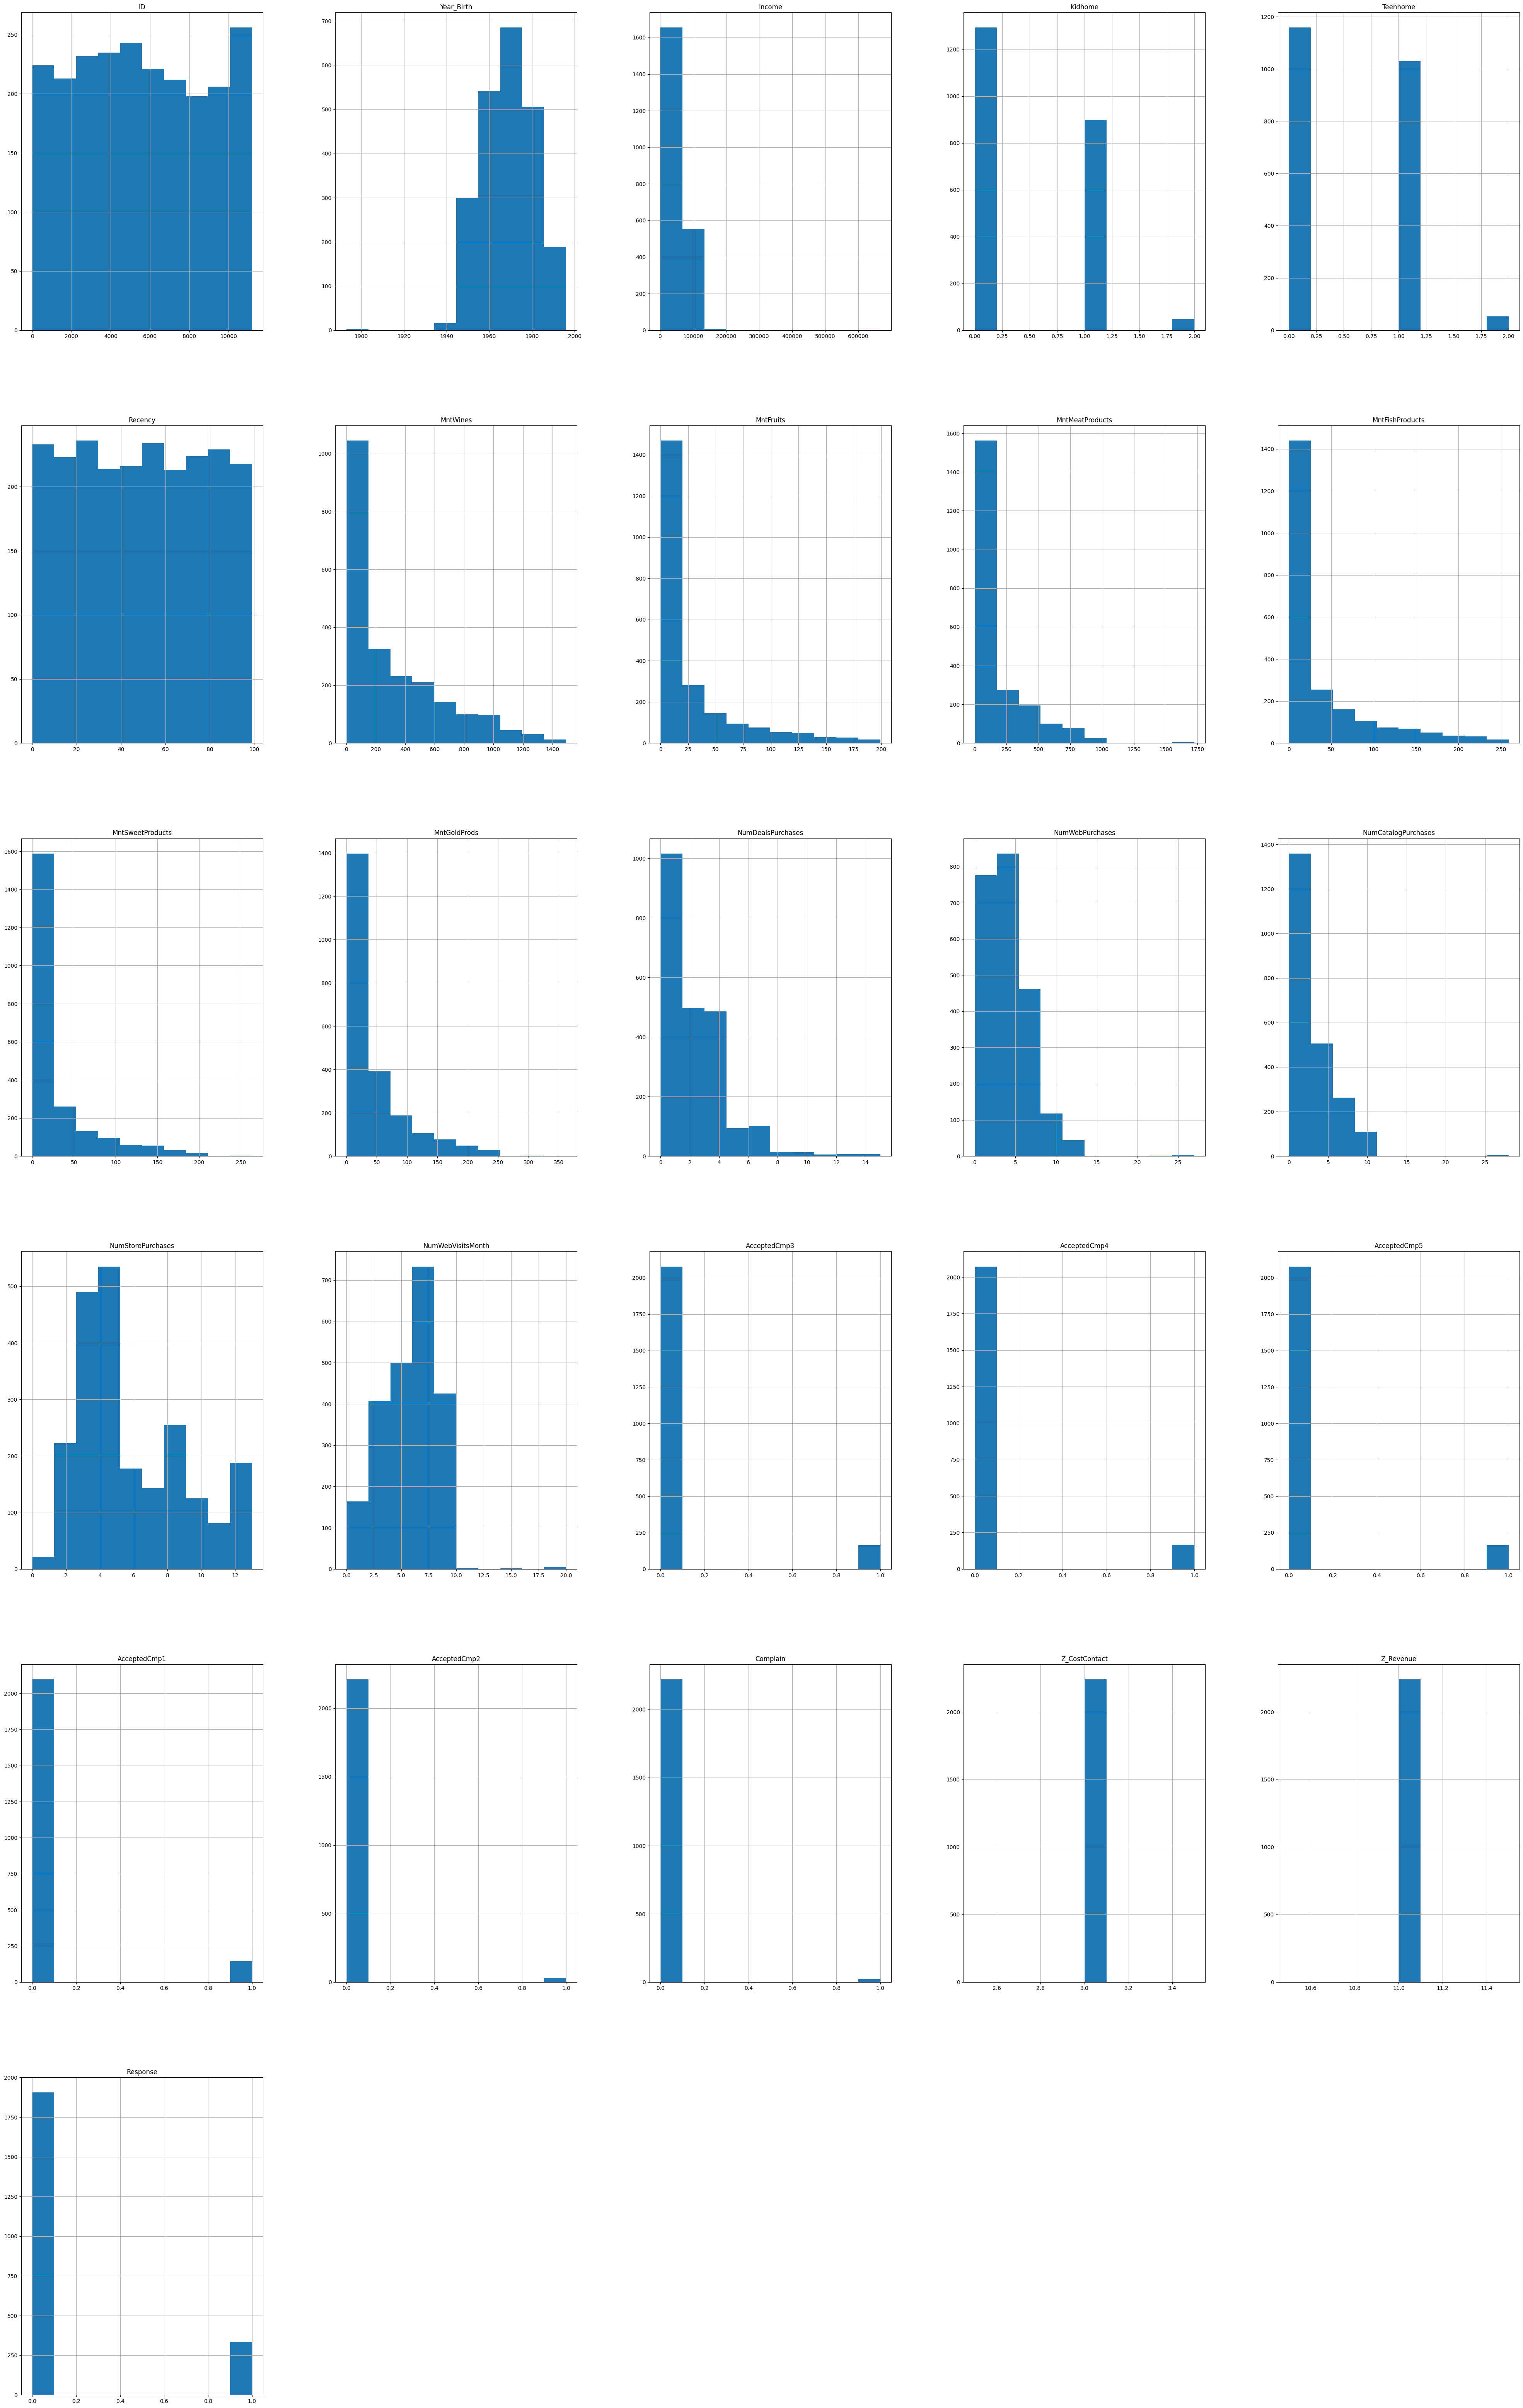

In [38]:
fig = plt.figure(figsize=(50,80),)
ax = fig.gca()
df.hist(ax = ax);